# Задача 1

In [2]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import math

eps = 10e-6

In [3]:
# дискретное время

num_of_fractions = 51  # количество делений на дискретной шкале времени
t = np.linspace(0, 2, num_of_fractions)  # дискретная шкала времени
dt = t[1] - t[0]  # шаг шкалы

In [4]:
# функционал в дискретном времени

def f(y):
    return np.sum(((y[1:] - y[:-1]) / dt) ** 2 + 2 * ((y[1:] - y[:-1]) / dt) * y[1:] +
                 y[1:] ** 2 + 3 * y[1:] * np.exp(2 * t[1:]))

In [5]:
y0 = [1 for _ in range(0, num_of_fractions)]

bounds = [(None, None) for _ in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (-15.0 - eps, -15.0 + eps), (1.0 - eps, 1.0 + eps)


In [6]:
# минимизируем функционал
res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)

In [7]:
res.x

array([-15.00001   , -14.62123496, -14.26245582, -13.9229079 ,
       -13.60184329, -13.29851051, -13.01219116, -12.74215124,
       -12.4876759 , -12.24805691, -12.02253975, -11.8104113 ,
       -11.6108959 , -11.42322921, -11.24660883, -11.08021709,
       -10.92319349, -10.77466171, -10.63370801, -10.49937798,
       -10.37066447, -10.24649573, -10.12572278, -10.00711541,
        -9.88936613,  -9.77108369,  -9.6507714 ,  -9.52682803,
        -9.39752949,  -9.26100548,  -9.1152379 ,  -8.95807298,
        -8.78713462,  -8.59988646,  -8.39354188,  -8.16508459,
        -7.91122793,  -7.62843657,  -7.31284694,  -6.96028216,
        -6.56618288,  -6.12558442,  -5.63307524,  -5.08278077,
        -4.46831497,  -3.7827544 ,  -3.01853916,  -2.1674978 ,
        -1.220672  ,  -0.16836555,   0.99999   ])

In [8]:
def f_analytical(t):
    return [(np.exp(-elem) * (31*np.exp(2*elem) + np.exp(3*elem) + 2*np.exp(2*elem + 2) - 
                             np.exp(2*elem + 6) + np.exp(3*elem + 4) - 
                              2*np.exp(2) - 31*np.exp(4) + np.exp(6))/(2*(np.exp(4) - 1))) for elem in t]

#y(t) = (e^(-t) (31 e^(2 t) - e^(3 t) + 2 e^(2 t + 2) -
#                e^(2 t + 6) + e^(3 t + 4) - 2 e^2 - 31 e^4 + e^6))/(2 (e^4 - 1))

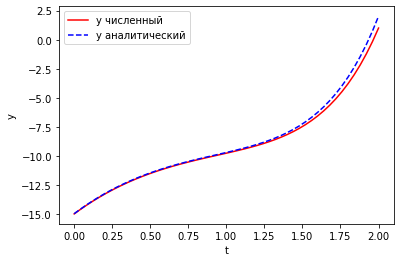

In [9]:
# численное и аналитическое решения примерно совпали
plt.plot(t, res.x, 'r', t, f_analytical(t), '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('y численный', 'y аналитический'))
plt.show()

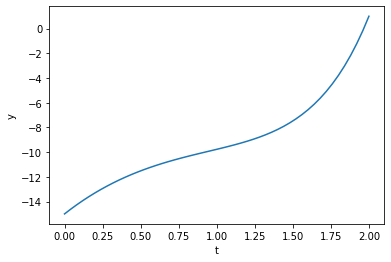

In [10]:
plt.plot(t, res.x)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

#### Максимум:

In [12]:
def f_to_max(y):
    return -np.sum(((y[1:] - y[:-1]) / dt) ** 2 + 2 * ((y[1:] - y[:-1]) / dt) * y[1:] +
                 y[1:] ** 2 + 3 * y[1:] * np.exp(2 * t[1:]))

In [13]:
res_max = minimize(f_to_max, y0, method='l-bfgs-b', bounds=bounds)

<ipython-input-12-99f1db9d7ac2>:2: RuntimeWarning: overflow encountered in square
  return -np.sum(((y[1:] - y[:-1]) / dt) ** 2 + 2 * ((y[1:] - y[:-1]) / dt) * y[1:] +
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-12-99f1db9d7ac2>:2: RuntimeWarning: overflow encountered in multiply
  return -np.sum(((y[1:] - y[:-1]) / dt) ** 2 + 2 * ((y[1:] - y[:-1]) / dt) * y[1:] +
<ipython-input-12-99f1db9d7ac2>:3: RuntimeWarning: overflow encountered in square
  y[1:] ** 2 + 3 * y[1:] * np.exp(2 * t[1:]))


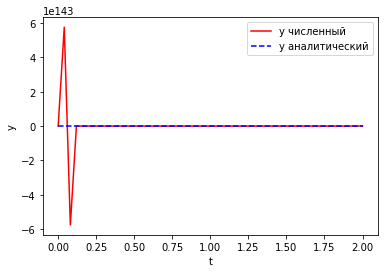

In [16]:
plt.plot(t, res_max.x, 'r', t, f_analytical(t), '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('y численный', 'y аналитический'))
plt.show()

В первом случае (минимизация) численное решение выглядит более совпадающим с аналитическим, поэтому здесь будет минимум

# Задача 2

In [2]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [3]:
# Инициализируем модель
m = GEKKO(remote=False)
nt = 501 #нам оф фрэкшнз
m.time = np.linspace(0,2,nt) #интеграл от 0 до 2

# Задаём переменные
y = m.Var(value=2) #y(0)=2
z = m.Var(value=5)
u = m.Var(value=5,lb=-3,ub=13) #от -3 до 13
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == 18 * y + u) #y'=18y+u
m.Equation(t.dt() == 1)
m.Equation(z.dt() == y - 15 * u) #подынтегральное выражение
m.Obj(z * final)    # Целевая функция
m.options.IMODE = 6 # задача оптимального управления/динамического программирования
m.solve(disp=True)

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:           3500
 Number of total equations: -         3000
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            500
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  4.54876E+01  1.28125E+00
    1 -7.35991E+02  1.17188E-10
    2 -8.07612E+

Exception: @error: Solution Not Found


решение не найдено!

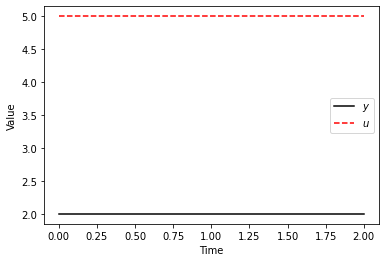

In [5]:
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

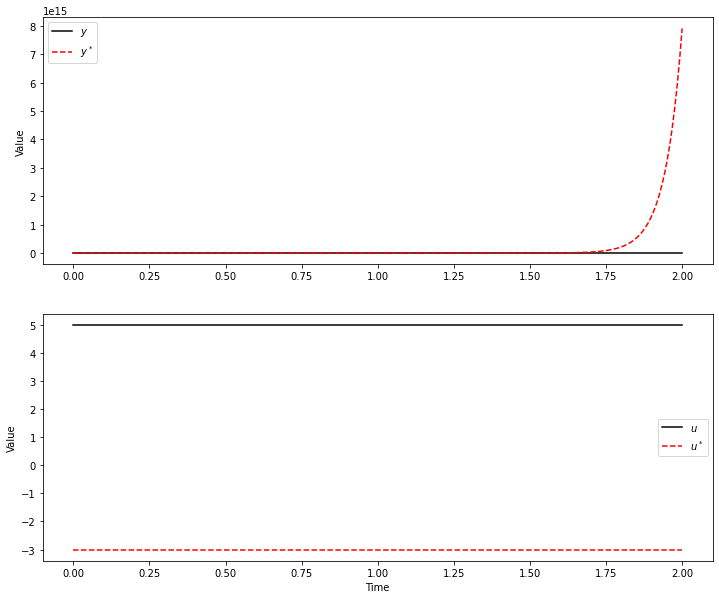

In [6]:
def u_a(t):
    return [-3 for elem in t]


def y_a(t):
    return [1/6*(11*np.exp(18 * elem) + 1) for elem in t]


plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(m.time,y.value,'k-',label=r'$y$')
plt.plot(m.time,y_a(m.time),'r--',label=r'$y^*$')
plt.legend(loc='best')
plt.ylabel('Value')
plt.subplot(2,1,2)
plt.plot(m.time,u.value,'k-',label=r'$u$')
plt.plot(m.time,u_a(m.time),'r--',label=r'$u^*$')
plt.legend(loc='best')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

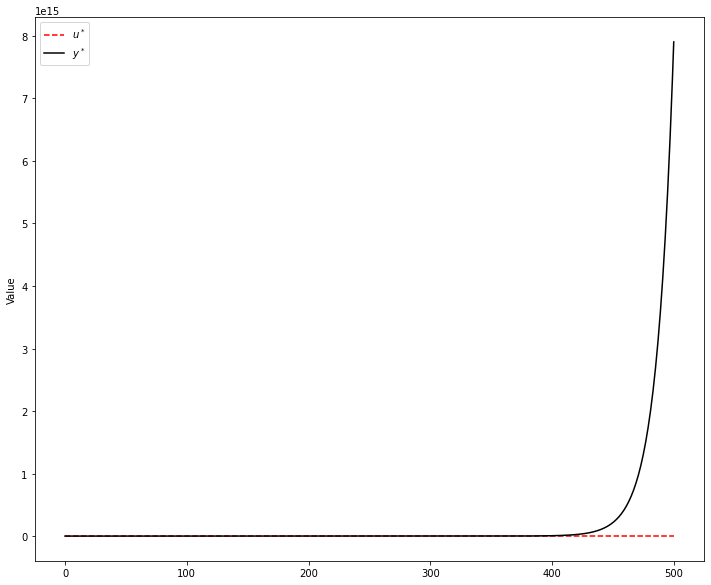

In [7]:
plt.figure(figsize=(12,10))

plt.plot(u_a(m.time),'r--',label=r'$u^*$')

plt.plot(y_a(m.time),'k-',label=r'$y^*$')

plt.legend(loc='best')
plt.ylabel('Value')
plt.show()

# Задача 3

In [8]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np

eps = 10e-6

In [9]:
# дискретное время

num_of_fractions = 51  # количество делений на дискретной шкале времени
t = np.linspace(0, np.pi / 2, num_of_fractions)  # дискретная шкала времени
dt = t[1] - t[0]  # шаг шкалы

In [10]:
# функционал в дискретном времени

def f(y):
    return np.sum(((y[1:] - y[:-1]) / dt) ** 2 - y[1:] ** 2)

In [11]:
y0 = [1 for _ in range(0, num_of_fractions)]

bounds = [(None, None) for _ in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (1.0 - eps, 1.0 + eps), (2.0 - eps, 2.0 + eps)



In [12]:
# минимизируем функционал
res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)

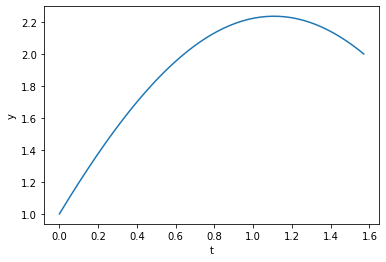

In [13]:
plt.plot(t, res.x)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

In [14]:
def f_analytical(t):
    return [2 * np.sin(elem) + np.cos(elem) for elem in t]


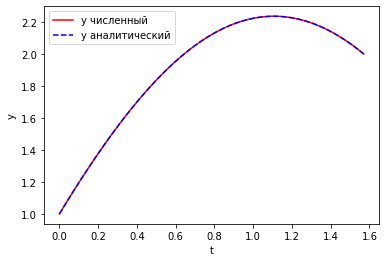

In [15]:
# численное и аналитическое решения совпали
plt.plot(t, res.x, 'r', t, f_analytical(t), '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('y численный', 'y аналитический'))
plt.show()

максимум

In [16]:
def f_to_max(y):
    return -np.sum(((y[1:] - y[:-1]) / dt) ** 2 - y[1:] ** 2)

In [17]:
res_max = minimize(f_to_max, y0, method='l-bfgs-b', bounds=bounds)

<ipython-input-16-eb25a15dd08e>:2: RuntimeWarning: overflow encountered in square
  return -np.sum(((y[1:] - y[:-1]) / dt) ** 2 - y[1:] ** 2)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-16-eb25a15dd08e>:2: RuntimeWarning: invalid value encountered in subtract
  return -np.sum(((y[1:] - y[:-1]) / dt) ** 2 - y[1:] ** 2)


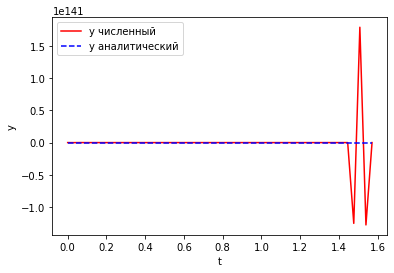

In [18]:
# численное и аналитическое решения совпали
plt.plot(t, res_max.x, 'r', t, f_analytical(t), '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('y численный', 'y аналитический'))
plt.show()